## **Descripción del proyecto**

**Te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
# Mostrar las primeras filas de cada dataset
print("\nVisits Data:")
print(df_visits.head())


Visits Data:
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [4]:
print("\nOrders Data:")
print(df_orders.head())


Orders Data:
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [5]:
print("\nCosts Data:")
print(df_costs.head())


Costs Data:
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [6]:
# Verificar los datos
print('Visits:')
df_visits.info()
print()
print('Orders:')
df_orders.info()
print()
print('Costs:')
df_costs.info()

Visits:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

Costs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     

### Optimizar los datos

In [7]:
# Renombrar columnas
df_visits.rename(columns={"Start Ts": "start_ts", "End Ts": "end_ts"}, inplace=True)
df_orders.rename(columns={"Buy Ts": "buy_ts"}, inplace=True)

# Convertir columnas a datetime
df_visits["start_ts"] = pd.to_datetime(df_visits["start_ts"])
df_visits["end_ts"] = pd.to_datetime(df_visits["end_ts"])
df_orders["buy_ts"] = pd.to_datetime(df_orders["buy_ts"])
df_costs["dt"] = pd.to_datetime(df_costs["dt"])

## Paso 2:  informes y calcular métricas

### Métricas de visitas

In [8]:
# Crear nuevas columnas datetime
df_visits['session_year']  = df_visits['start_ts'].dt.isocalendar().year
df_visits['session_month'] = df_visits['start_ts'].dt.month
df_visits['session_week']  = df_visits['start_ts'].dt.isocalendar().week
df_visits['session_date'] = df_visits['start_ts'].dt.date
print(df_visits.head())

    Device              end_ts  Source Id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date  
0   2017-12-20  
1   2018-02-19  
2   2017-07-01  
3   2018-05-20  
4   2017-12-27  


In [9]:
# Usuarios por día y semana
dau_total = df_visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total = df_visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()

print(f'Usuarios por día = {int(dau_total)}')
print(f'Usuarios por semana = {int(wau_total)}')

Usuarios por día = 907
Usuarios por semana = 5716


In [10]:
# Sesiones de usuario
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])
df_visits['session_year'] = df_visits['start_ts'].dt.year
df_visits['session_month'] = df_visits['start_ts'].dt.month
sessions_per_user = df_visits.groupby(['session_year', 'session_month']).agg(
    {'Uid': ['count', 'nunique']}
)
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
print(sessions_per_user)

                            n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017         6                   16505    13259           1.244815
             7                   17828    14183           1.256998
             8                   14355    11631           1.234202
             9                   23907    18975           1.259921
             10                  37903    29692           1.276539
             11                  43969    32797           1.340641
             12                  41983    31557           1.330386
2018         1                   36939    28716           1.286356
             2                   37182    28749           1.293332
             3                   35679    27473           1.298693
             4                   26515    21008           1.262138
             5                   26635    20701           1.286653


In [11]:
# Duración media de la sesión o ASL
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
print('La duración media por sesión es:')
print(df_visits['session_duration_sec'].mean())

La duración media por sesión es:
643.506488592098


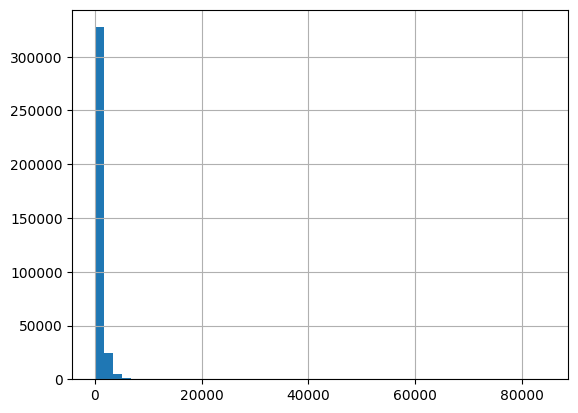

In [12]:
# Veamos la distribución
df_visits['session_duration_sec'].hist(bins=50)
plt.show()

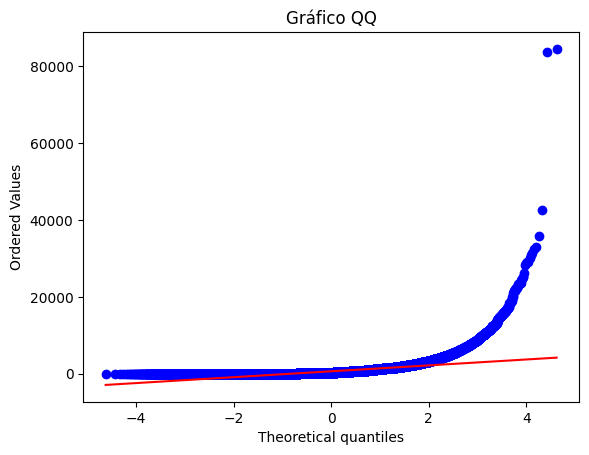

In [13]:
import scipy.stats as stats

stats.probplot(df_visits['session_duration_sec'], dist="norm", plot=plt)
plt.title("Gráfico QQ")
plt.show()

### Conclusión 
- Las sesiones tienen una distribución normal o casi normal.

## Métricas de ventas

In [14]:
df_orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

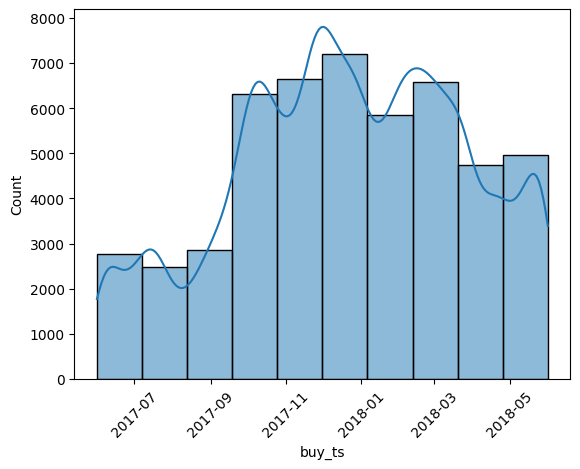

In [15]:
plt.xticks(rotation=45)  
sns.histplot(df_orders['buy_ts'].astype("datetime64"), bins=10, kde=True,)
plt.show()

In [16]:
df_costs['dt'].describe()

count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

- El rango de fechas de gastos coincide con el de fechas de pedidos.

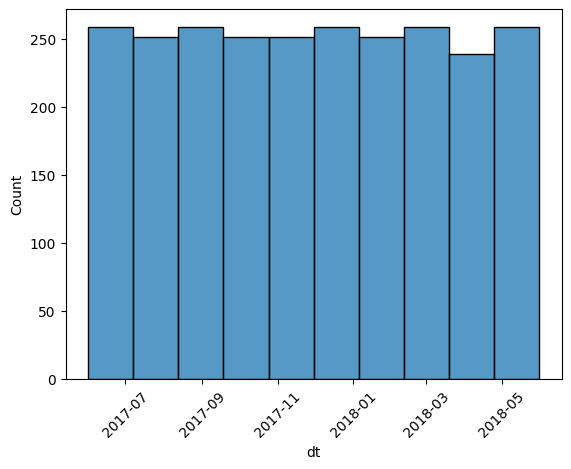

In [17]:
plt.xticks(rotation=45)  
sns.histplot(df_costs['dt'].astype("datetime64"), bins=10)
plt.show()

### LVT

In [18]:
# Cohortes mensuales
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')
df_costs['month'] = df_costs['dt'].astype('datetime64[M]')

# Recuperar el mes de la primera compra de cada cliente
first_orders = df_orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

# Calcularemos el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()


,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


- Creemos cohortes, Vamos a agregar los meses de la primera compra de los clientes a la tabla de pedidos:

In [19]:
df_orders.rename(columns={"Uid": "uid"}, inplace=True)

In [20]:
df_orders_ = pd.merge(df_orders,first_orders, on='uid')
df_orders_.head()

,buy_ts,Revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [21]:
# Agrupar la tabla de pedidos por mes de la primera compra y mes de la compra y totalizar los ingresos
cohorts = df_orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [22]:
# Agregar datos sobre cuántos usuarios realizaron sus primeras compras en cada mes a la tabla cohorts
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [23]:
# Hagamos que las columnas muestren la edad de la cohorte en lugar del mes del pedido
import numpy as np
margin_rate = 0.5

report['gp'] = report['Revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


In [24]:
# Calcular el LTV
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round()

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,2.0,0.0,0.0,1.0,0.0,0.0,,,,,,
2018-01-01,2.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,2.0,0.0,0.0,0.0,,,,,,,,


In [25]:
# Encontremos el LTV de la primera cohorte sumando el valor de cada mes
ltv_201803 = output.loc['2017-06-01'].sum()
print(f'El LTV es: {ltv_201803}')

El LTV es: 3.0


## Métricas de marketing

In [26]:
# obtener la cohorte necesaria
cohort_201803 = report[report['first_order_month'] == '2017-06-01']

# calcular los costos para el mes de la cohorte
costs_201803 = df_costs[df_costs['month'] == '2017-06-01']['costs'].sum()

n_buyers_201803 = cohort_201803['n_buyers'][0]
cac_201803 = costs_201803 / n_buyers_201803
ltv_201803   = output.loc['2018-03-01'].sum()

print('CAC =', cac_201803)
print('LTV =', ltv_201803)

CAC = 8.905091448344043
LTV = 2.0


- Adquirir cada cliente le costó a la empresa un promedio de 8.91 mientras que cada cliente generó 2.00. 
Por lo tanto, la inversión en la adquisición de clientes no obtuvo resultados positivos ya que hubo pérdida.

In [27]:
# calcular los costos por mes
monthly_costs = df_costs.groupby('month').sum()
monthly_costs.head()

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


In [28]:
# Agreguemos los datos sobre los costos al informe y calculemos el CAC
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,1020,18015.0,8.905091


### ROMI

In [29]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07-01,0.32,0.33,0.37,0.39,0.40,0.40,0.41,0.42,0.43,0.43,0.44,NaN
2017-08-01,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,NaN,NaN
2017-09-01,0.30,0.36,0.39,0.60,0.62,0.65,0.69,0.70,0.71,NaN,NaN,NaN
2017-10-01,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,NaN,NaN,NaN,NaN
2017-11-01,0.28,0.30,0.31,0.33,0.34,0.34,0.34,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.27,0.29,0.34,0.40,0.42,0.44,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.21,0.22,0.24,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.23,0.25,0.25,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualización ROMI

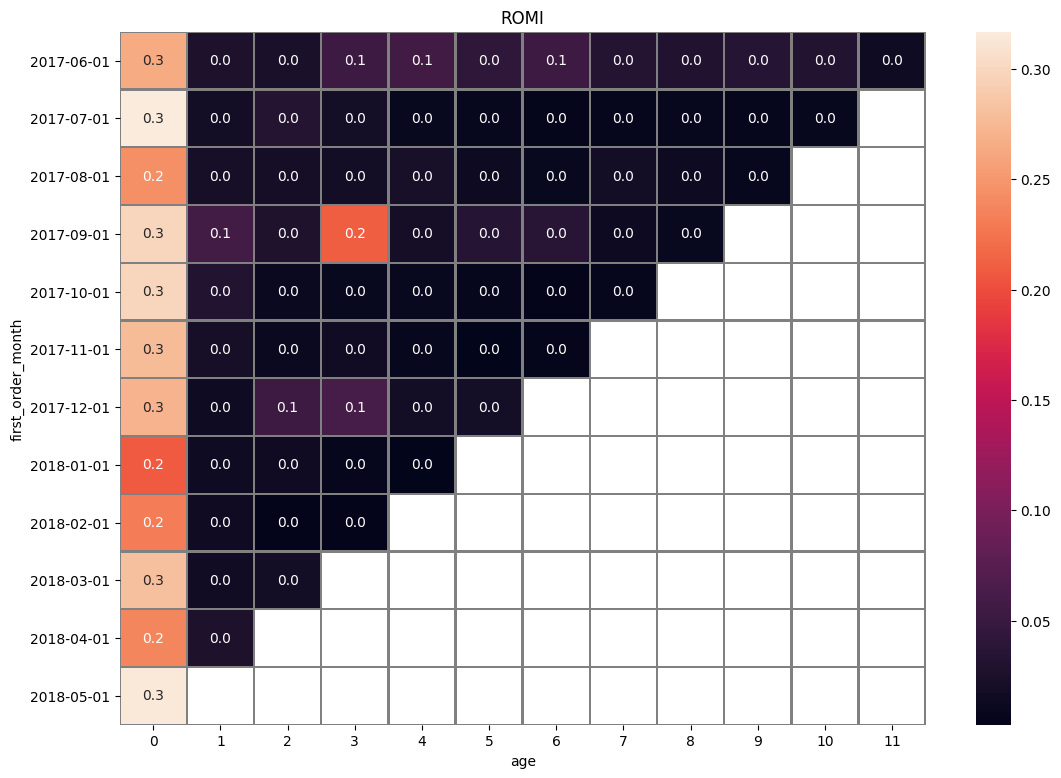

In [36]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output.cumsum(axis=1).round(2)
output.index = output.index.strftime('%Y-%m-%d')

plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(
    output,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='grey',
)
plt.show()

# Visualización de datos - Gráficos

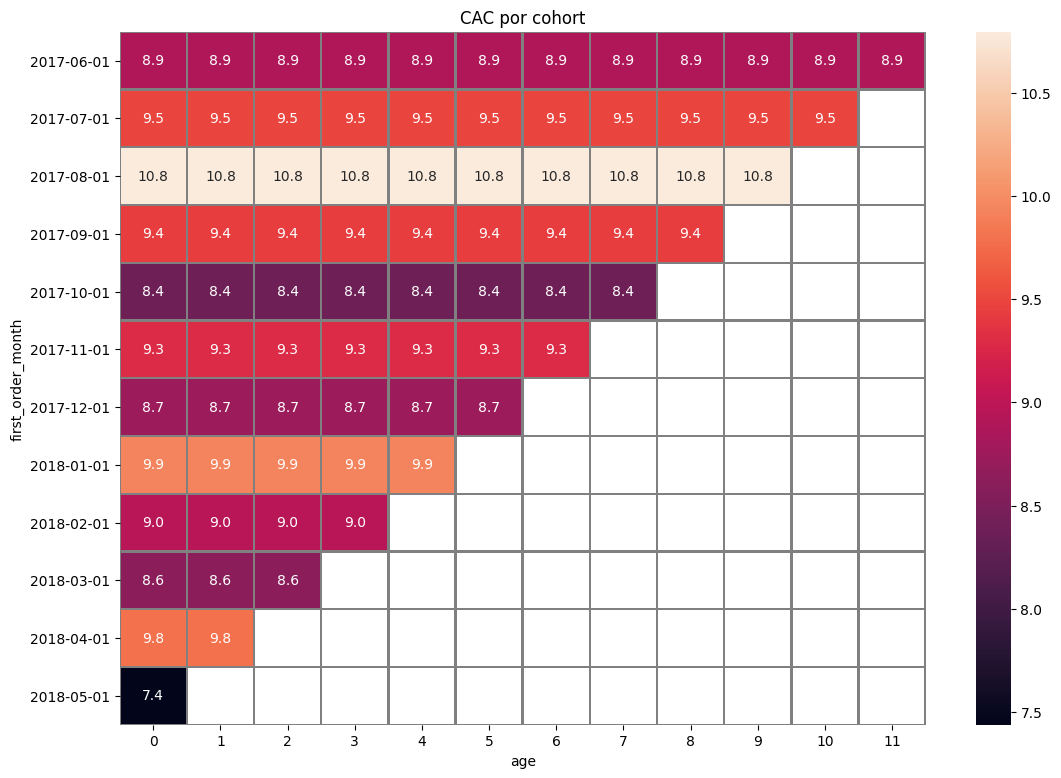

In [38]:
# Creación de tablas dinamicas - Mapa de calor CAC
cac_x_cohort = report_.pivot_table(
    index="first_order_month", 
    columns="age", 
    values="cac", 
    aggfunc="mean"
)

cac_x_cohort.index = cac_x_cohort.index.strftime('%Y-%m-%d')

plt.figure(figsize=(13, 9))
plt.title('CAC por cohort')
sns.heatmap(
    cac_x_cohort,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='grey',
)
plt.show()

### Conclusión
- Lo que nos dice el informe es que ninguna cohorte tuvo un buen rendimiento en ningun mes, fracaso total. Sin embargo se puede ver que a pesar de no ser rentable, cada cohorte mejora mes a mes aumentando sus cifras.

### Recomendación
- Buscar otra estrategia.
- Reducir el CAC aunque esto puede repercutir negativamente a la hora de llegar a otros clientes.
- Ya que vemos que los numeros aumentan mes a mes, no todo es malo, podriamos sacar algo de ahi para implementar una nueva estrategia.


## **Conclusiones y Recomendaciones**

Tras analizar los datos de visitas, órdenes y costos del marketing para Showz, se pueden extraer las siguientes conclusiones:

- **Rendimiento general**: Se observan variaciones significativas en el rendimiento entre diferentes días y semanas, lo que indica que el comportamiento del usuario cambia dependiendo de la temporada o campañas específicas.
- **Gasto publicitario**: Algunas campañas o días presentan un costo elevado sin un retorno proporcional en órdenes, lo que sugiere una posible ineficiencia.
- **Tendencias de conversión**: Existen días con una mejor tasa de conversión, lo cual puede aprovecharse optimizando el calendario de campañas.

### **Recomendaciones para el equipo de marketing:**

1. **Revisar los días de bajo rendimiento**: Identificar qué factores externos pueden estar afectando la conversión esos días (tipo de evento, día de la semana, etc.).
2. **Optimizar el presupuesto**: Redistribuir la inversión hacia los días y canales que generan una mejor relación costo/beneficio.
3. **Realizar pruebas A/B**: Evaluar cambios en los anuncios o en la segmentación del público para aumentar la efectividad de las campañas.
4. **Monitoreo continuo**: Establecer un sistema de monitoreo semanal para reaccionar rápidamente ante campañas poco efectivas.

**Este análisis ofrece un punto de partida para una estrategia de marketing basada en datos, lo cual permite tomar decisiones más acertadas y eficientes.**

---
